In [27]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import itertools
import pandas as pd

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


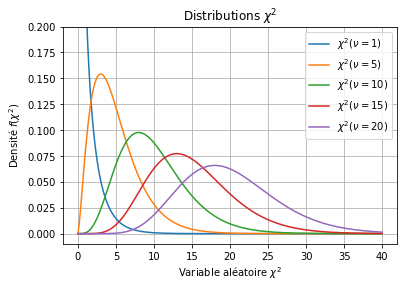

In [2]:
xlin = np.linspace(0., 40., 250)
fig, axe = plt.subplots()
for dof in [1, 5, 10, 15, 20]:
    X = stats.chi2(df=dof)
    axe.plot(xlin, X.pdf(xlin), label=r"$\chi^2(\nu={:d})$".format(dof))
axe.set_title(r"Distributions $\chi^2$")
axe.set_xlabel(r"Variable aléatoire $\chi^2$")
axe.set_ylabel(r"Densité $f(\chi^2)$")
axe.legend()
axe.grid()
axe.set_ylim([-0.01, 0.20])
axe.figure.savefig("figures/chi2dist.eps")

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


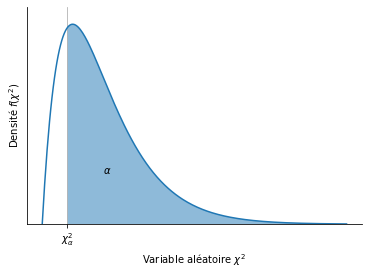

In [67]:
xlin = np.linspace(0., 20., 250)
fig, axe = plt.subplots()
dof = 4
X = stats.chi2(df=dof)
Xc = X.ppf(0.20)
xclin = np.linspace(Xc, 20., 250)
axe.plot(xlin, X.pdf(xlin), label=r"$\chi^2(\nu={:d})$".format(dof))
axe.fill_between(xclin, X.pdf(xclin), alpha=0.5)
#axe.axvline(Xc, color="black")
axe.set_xticks([Xc])
axe.set_xticklabels([r"$\chi^2_\alpha$"])
axe.set_yticks([])
axe.spines[['right', 'top']].set_visible(False)
axe.grid()
fig.text(0.3, 0.3, r"$\alpha$")
#axe.set_title(r"Distribution $\chi^2$")
axe.set_xlabel(r"Variable aléatoire $\chi^2$")
axe.set_ylabel(r"Densité $f(\chi^2)$")
axe.set_ylim([0, 0.20])
axe.figure.savefig("figures/chi2gendist.eps")

In [20]:
alphas = np.array([
    0.0010, 0.0025, 0.0050, 0.0100, 0.0250, 0.0500, 0.1000, 0.2500, 0.5000,
    0.7500, 0.9000, 0.9250, 0.9500, 0.9900, 0.9925, 0.9950, 0.9990
])
nus = np.arange(1, 31)

In [64]:
data = np.full((nus.size, alphas.size), np.nan)
for i, nu in enumerate(nus):
    X = stats.chi2(df=nu)
    for j, alpha in enumerate(alphas):
        data[i,j] = X.ppf(1 - alpha)
table = pd.DataFrame(data, index=nus, columns=alphas)
table.to_csv("chi2table.csv", sep=";")
#table.index.name = "nu"
#table.columns.name = "alpha"

In [50]:
table

,0.0010,0.0025,0.0050,0.0100,0.0250,0.0500,0.1000,0.2500,0.5000,0.7500,0.9000,0.9250,0.9500,0.9900,0.9925,0.9950,0.9990
1,10.827566,9.140593,7.879439,6.634897,5.023886,3.841459,2.705543,1.323304,0.454936,0.101531,0.015791,0.008862,0.003932,0.000157,0.000088,0.000039,0.000002
2,13.815511,11.982929,10.596635,9.210340,7.377759,5.991465,4.605170,2.772589,1.386294,0.575364,0.210721,0.155923,0.102587,0.020101,0.015057,0.010025,0.002001
3,16.266236,14.320347,12.838156,11.344867,9.348404,7.814728,6.251389,4.108345,2.365974,1.212533,0.584374,0.471993,0.351846,0.114832,0.094407,0.071722,0.024298
4,18.466827,16.423936,14.860259,13.276704,11.143287,9.487729,7.779440,5.385269,3.356694,1.922558,1.063623,0.896936,0.710723,0.297109,0.255549,0.206989,0.090804
5,20.515006,18.385613,16.749602,15.086272,12.832502,11.070498,9.236357,6.625680,4.351460,2.674603,1.610308,1.393711,1.145476,0.554298,0.489576,0.411742,0.210213
6,22.457744,20.249402,18.547584,16.811894,14.449375,12.591587,10.644641,7.840804,5.348121,3.454599,2.204131,1.941493,1.635383,0.872090,0.783839,0.675727,0.381067
7,24.321886,22.040391,20.277740,18.475307,16.012764,14.067140,12.017037,9.037148,6.345811,4.254852,2.833107,2.527658,2.167350,1.239042,1.127576,0.989256,0.598494
8,26.124482,23.774474,21.954955,20.090235,17.534546,15.507313,13.361566,10.218855,7.344121,5.070640,3.489539,3.143974,2.732637,1.646497,1.512399,1.344413,0.857105
9,27.877165,25.462479,23.589351,21.665994,19.022768,16.918978,14.683657,11.388751,8.342833,5.898826,4.168159,3.784749,3.325113,2.087901,1.931849,1.734933,1.151950
10,29.588298,27.112171,25.188180,23.209251,20.483177,18.307038,15.987179,12.548861,9.341818,6.737201,4.865182,4.445870,3.940299,2.558212,2.380898,2.155856,1.478743
